In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the original dataset
df_original = pd.read_csv('/content/heart_cleaned.csv')

In [3]:
#identify categarical data
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
print("Categorical Columns:", categorical_cols)
print("\nOriginal Data Types:")
print(df_original.dtypes)
print("\nFirst few rows of original dataset:")
display(df_original.head()) # Use display() for better table rendering in Jupyter

Categorical Columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

Original Data Types:
age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg       int64
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target        int64
dtype: object

First few rows of original dataset:


age     sex              cp  trestbps  chol     fbs  restecg  thalach  \
0   52    Male  Typical angina       125   212  Normal        1      168   
1   53    Male  Typical angina       140   203    High        0      155   
2   70    Male  Typical angina       145   174  Normal        1      125   
3   61    Male  Typical angina       148   203  Normal        1      161   
4   62  Female  Typical angina       138   294    High        1      106   

  exang  oldpeak        slope  ca          thal  target  
0    No      1.0    Upsloping   2        Normal       0  
1   Yes      3.1  Downsloping   0        Normal       0  
2   Yes      2.6  Downsloping   0        Normal       0  
3    No      0.0    Upsloping   1        Normal       0  
4    No      1.9         Flat   3  Fixed Defect       0

In [6]:
# 1. Label Encoding (fbs, exang, slope, ca, thal)
df_encoded = df_original.copy() # Work on a copy
label_encoders = {}
# Define ordinal columns as per the integrated pipeline
ordinal_cols = ['fbs', 'exang', 'slope', 'ca', 'thal']
for col in ordinal_cols:
    le = LabelEncoder()
    df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    print(f"\nLabel Encoded '{col}' -> '{col}_encoded'")
    print(f"  Unique values in '{col}' (original): {sorted(df_original[col].unique())}")
    print(f"  Encoded values: {sorted(df_encoded[col + '_encoded'].unique())}")


Label Encoded 'fbs' -> 'fbs_encoded'
  Unique values in 'fbs' (original): ['High', 'Normal']
  Encoded values: [np.int64(0), np.int64(1)]

Label Encoded 'exang' -> 'exang_encoded'
  Unique values in 'exang' (original): ['No', 'Yes']
  Encoded values: [np.int64(0), np.int64(1)]

Label Encoded 'slope' -> 'slope_encoded'
  Unique values in 'slope' (original): ['Downsloping', 'Flat', 'Upsloping']
  Encoded values: [np.int64(0), np.int64(1), np.int64(2)]

Label Encoded 'ca' -> 'ca_encoded'
  Unique values in 'ca' (original): [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
  Encoded values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]

Label Encoded 'thal' -> 'thal_encoded'
  Unique values in 'thal' (original): ['Fixed Defect', 'Normal', 'Reversible Defect']
  Encoded values: [np.int64(0), np.int64(1), np.int64(2)]


In [7]:
# Display the DataFrame after label encoding
print("\n--- Dataset after Label Encoding (first few rows) ---")


--- Dataset after Label Encoding (first few rows) ---


In [8]:
# Show only the original and their corresponding encoded columns for clarity
columns_to_show = [col for col in df_encoded.columns if col in ordinal_cols or col.endswith('_encoded')]
display(df_encoded[columns_to_show].head())

fbs exang        slope  ca          thal  fbs_encoded  exang_encoded  \
0  Normal    No    Upsloping   2        Normal            1              0   
1    High   Yes  Downsloping   0        Normal            0              1   
2  Normal   Yes  Downsloping   0        Normal            1              1   
3  Normal    No    Upsloping   1        Normal            1              0   
4    High    No         Flat   3  Fixed Defect            0              0   

   slope_encoded  ca_encoded  thal_encoded  
0              2           2             1  
1              0           0             1  
2              0           0             1  
3              2           1             1  
4              1           3             0

In [20]:
# 2. One-Hot Encoding (sex, cp, restecg)
# Apply One-Hot Encoding and ensure the result is integer type (0s and 1s)
df_final = pd.get_dummies(df_encoded, columns=['sex', 'cp', 'restecg'], prefix=['sex', 'cp', 'restecg'], drop_first=False, dtype=int)
# Drop original ordinal columns (we kept the _encoded versions)
df_final = df_final.drop(columns=ordinal_cols)
print(f"\n--- Dataset shape after One-Hot Encoding: {df_final.shape}")
print("\nData Types after One-Hot Encoding (first few):")
print(df_final.dtypes.head(15)) # Show more types to see the new dummy vars


--- Dataset shape after One-Hot Encoding: (1025, 20)

Data Types after One-Hot Encoding (first few):
age                     int64
trestbps                int64
chol                    int64
thalach                 int64
oldpeak               float64
target                  int64
fbs_encoded             int64
exang_encoded           int64
slope_encoded           int64
ca_encoded              int64
thal_encoded            int64
sex_Female              int64
sex_Male                int64
cp_Asymptomatic         int64
cp_Atypical angina      int64
dtype: object


In [ ]:
# Drop original ordinal columns (we kept the _encoded versions)
df_final = df_final.drop(columns=ordinal_cols)


In [22]:
# Display the final DataFrame after all encoding steps
print("\n--- Final Dataset after All Encoding Steps (first few rows) ---")
display(df_final.head())


--- Final Dataset after All Encoding Steps (first few rows) ---


age  trestbps  chol  thalach  oldpeak  target  fbs_encoded  exang_encoded  \
0   52       125   212      168      1.0       0            1              0   
1   53       140   203      155      3.1       0            0              1   
2   70       145   174      125      2.6       0            1              1   
3   61       148   203      161      0.0       0            1              0   
4   62       138   294      106      1.9       0            0              0   

   slope_encoded  ca_encoded  thal_encoded  sex_Female  sex_Male  \
0              2           2             1           0         1   
1              0           0             1           0         1   
2              0           0             1           0         1   
3              2           1             1           0         1   
4              1           3             0           1         0   

   cp_Asymptomatic  cp_Atypical angina  cp_Non-anginal pain  \
0                0                   0                    0   
1                0                   0                    0   
2                0                   0                    0   
3                0                   0                    0   
4                0                   0                    0   

   cp_Typical angina  restecg_0  restecg_1  restecg_2  
0                  1          0          1          0  
1                  1          1          0          0  
2                  1          0          1          0  
3                  1          0          1          0  
4                  1          0          1          0

In [13]:
# (Assuming df_final is the result after encoding steps)
import os

# Define the output directory
output_dir = 'results/outputs/'
os.makedirs(output_dir, exist_ok=True) # Create directory if it doesn't exist

# Define the file path
encoded_dataset_path = os.path.join(output_dir, 'heart_data_encoded.csv')

# Save the encoded dataset to a CSV file
df_final.to_csv(encoded_dataset_path, index=False)

print(f"Encoded dataset saved to: {encoded_dataset_path}")

Encoded dataset saved to: results/outputs/heart_data_encoded.csv


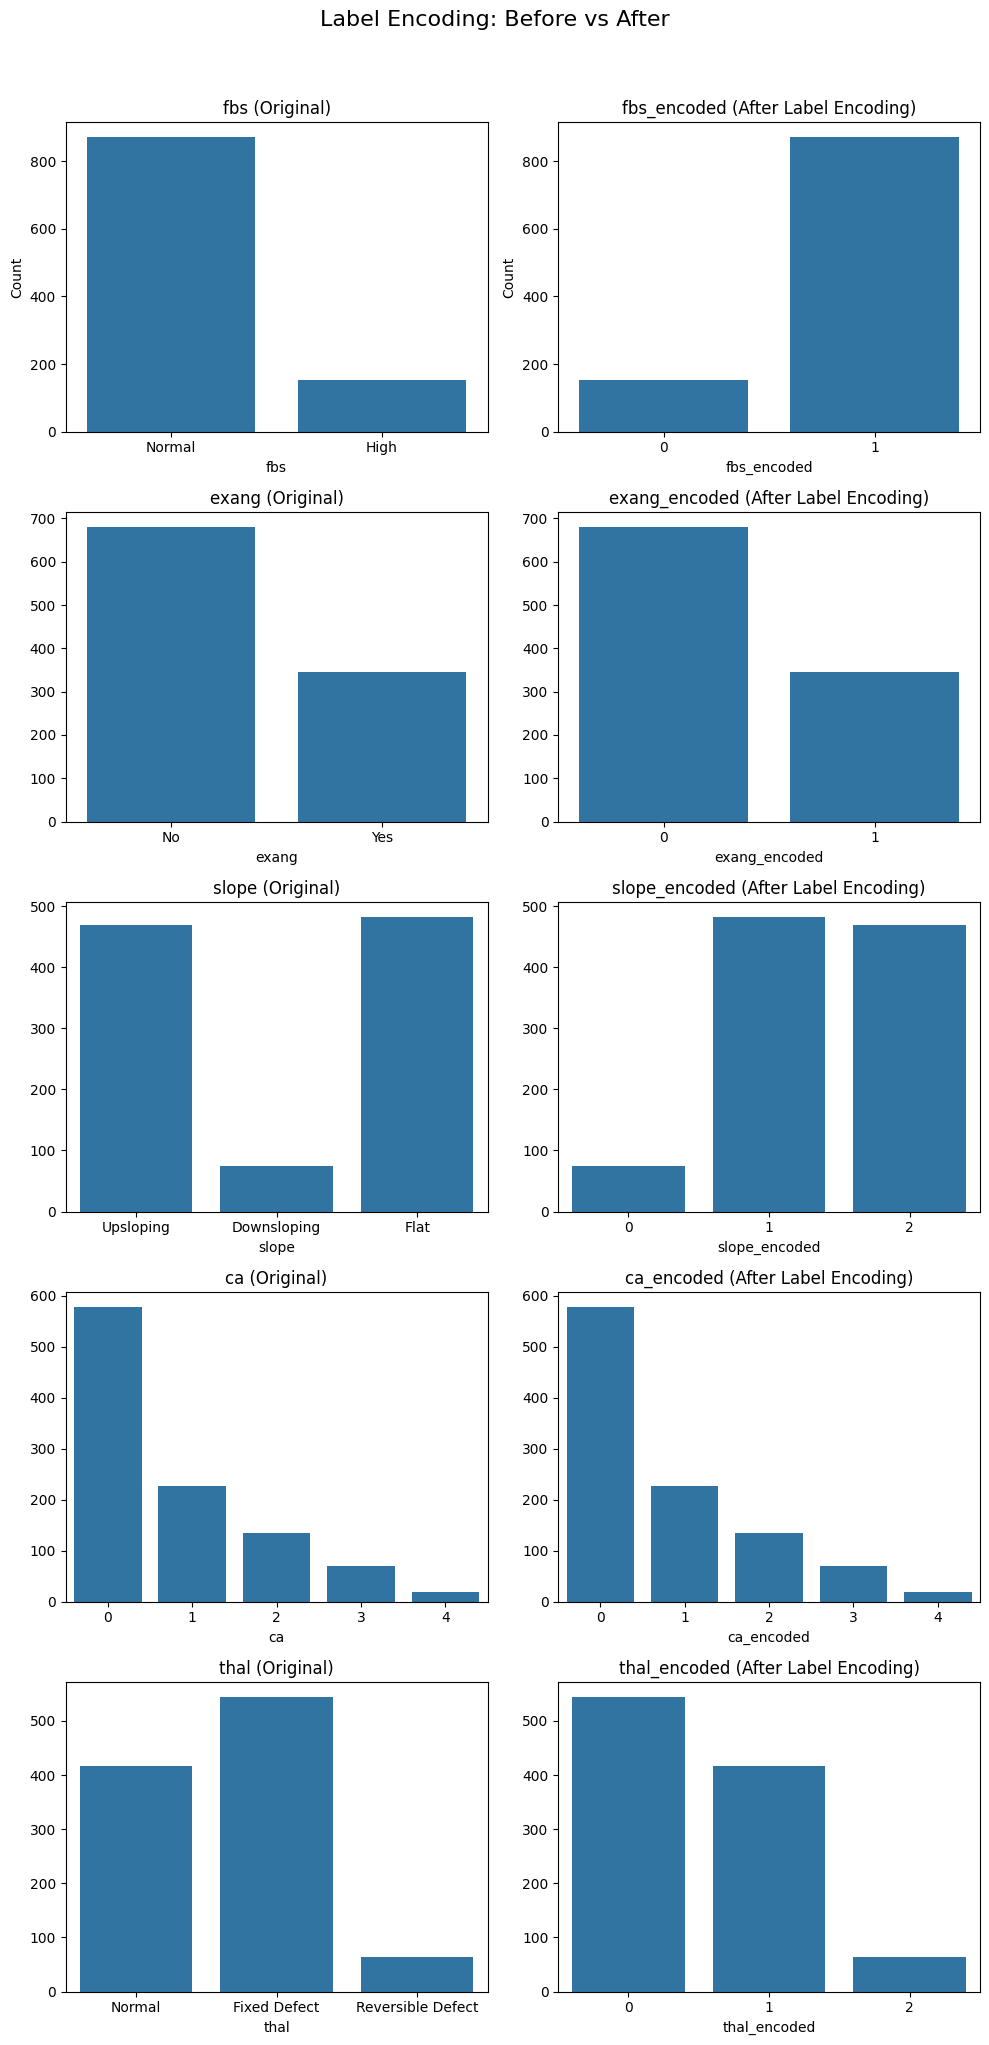

In [15]:
# 3. Label Encoding Visualization: Before vs After
label_encoded_cols = ['fbs', 'exang', 'slope', 'ca', 'thal']
num_label_cols = len(label_encoded_cols)
fig, axes = plt.subplots(nrows=num_label_cols, ncols=2, figsize=(10, 4*num_label_cols))

for i, col in enumerate(label_encoded_cols):
    # Before Encoding (Original)
    sns.countplot(data=df_original, x=col, ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} (Original)')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Count' if i == 0 else '') # Only label y-axis on first row

    # After Encoding (Label Encoded)
    sns.countplot(data=df_encoded, x=col + '_encoded', ax=axes[i, 1])
    axes[i, 1].set_title(f'{col}_encoded (After Label Encoding)')
    axes[i, 1].set_xlabel(f'{col}_encoded')
    axes[i, 1].set_ylabel('Count' if i == 0 else '')

plt.suptitle('Label Encoding: Before vs After', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [16]:
# 4. One-Hot Encoding Visualization: Before vs After
one_hot_cols_original = ['sex', 'cp', 'restecg']
num_onehot_cols = len(one_hot_cols_original)

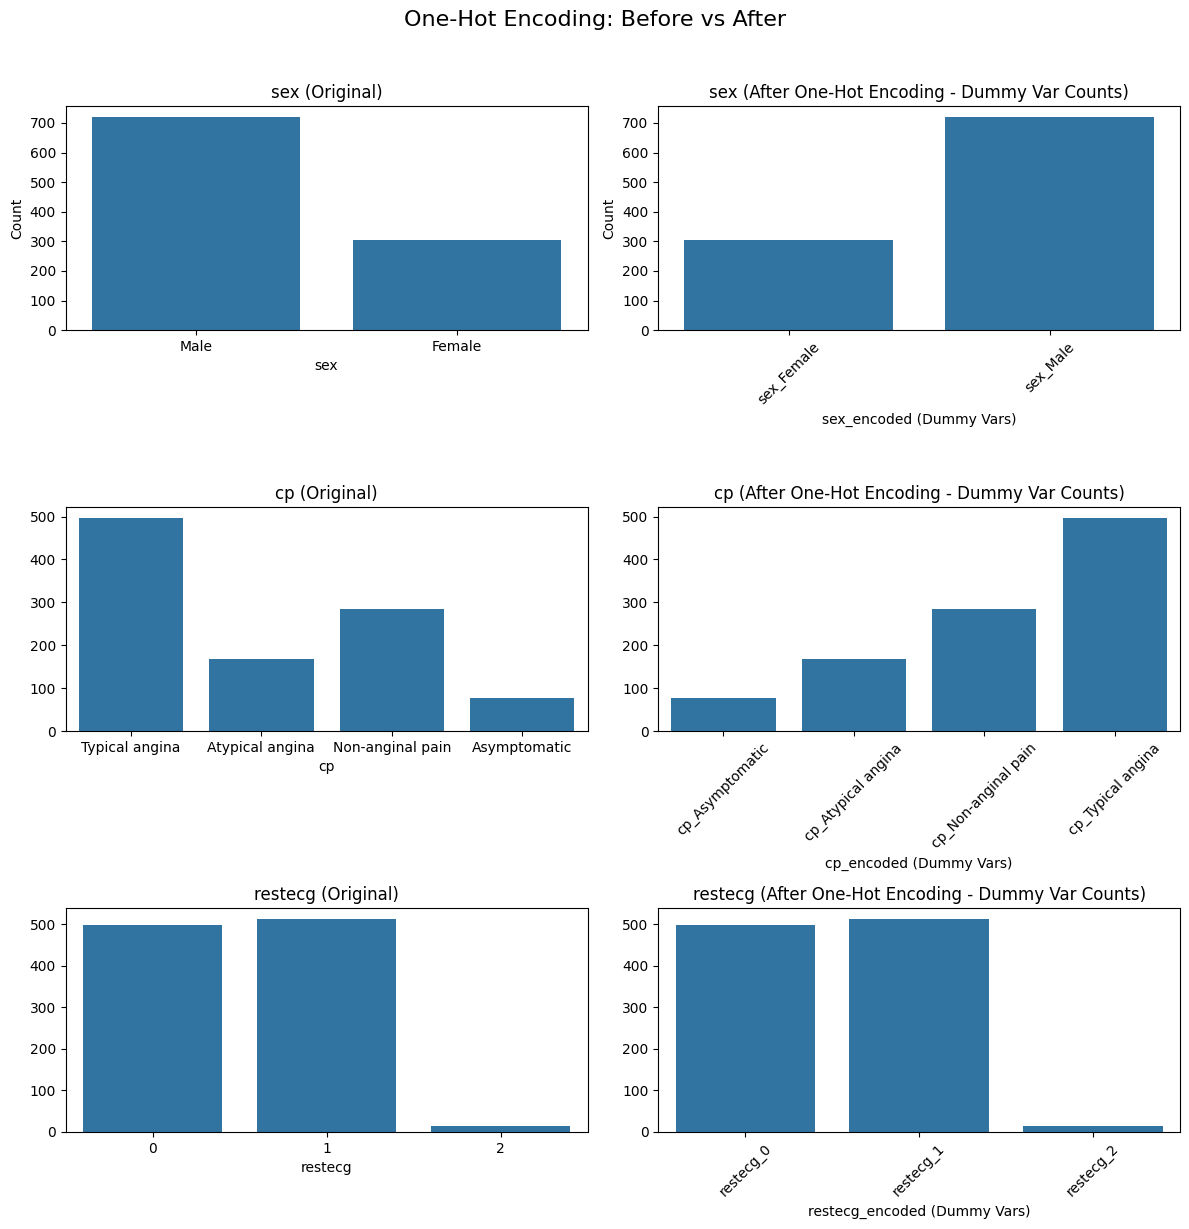

In [19]:
# Calculate rows needed for subplots: 2 columns (Before, After) for each original column
fig, axes = plt.subplots(nrows=num_onehot_cols, ncols=2, figsize=(12, 4*num_onehot_cols))

for i, col_orig in enumerate(one_hot_cols_original):
    # --- Plot 1: Original Categorical Distribution ---
    sns.countplot(data=df_original, x=col_orig, ax=axes[i, 0])
    axes[i, 0].set_title(f'{col_orig} (Original)')
    axes[i, 0].set_xlabel(col_orig)
    axes[i, 0].set_ylabel('Count' if i == 0 else '') # Only label y-axis on first row
    # --- Plot 2: Count of 1s in Each Dummy Variable ---
    # Find the dummy columns created for this original column (e.g., 'sex_0', 'sex_1')
    dummy_cols = [c for c in df_final.columns if c.startswith(f'{col_orig}_')]
    if dummy_cols:
        # Count how many times each dummy variable is 1 across all rows
        counts_after_encoding = df_final[dummy_cols].sum()
        # Create a DataFrame for the count plot
        count_df = pd.DataFrame({'Variable': counts_after_encoding.index, 'Count': counts_after_encoding.values})
        sns.barplot(data=count_df, x='Variable', y='Count', ax=axes[i, 1])
        axes[i, 1].set_title(f'{col_orig} (After One-Hot Encoding - Dummy Var Counts)')
        axes[i, 1].set_xlabel(f'{col_orig}_encoded (Dummy Vars)')
        axes[i, 1].set_ylabel('Count' if i == 0 else '')
        axes[i, 1].tick_params(axis='x', rotation=45) # Rotate x-axis labels if needed
    else:
        axes[i, 1].text(0.5, 0.5, 'No dummy vars found', horizontalalignment='center', verticalalignment='center', transform=axes[i, 1].transAxes)
        axes[i, 1].set_title(f'{col_orig} (After One-Hot Encoding - Dummy Vars)')

plt.suptitle('One-Hot Encoding: Before vs After', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()



In [23]:
# Save the final encoded dataset
df_final.to_csv('/content/heart_data_fully_encoded.csv', index=False)

# Read and display the saved file
df_encoded_full = pd.read_csv('/content/heart_data_fully_encoded.csv')
print(f"Final encoded dataset shape: {df_encoded_full.shape}")
display(df_encoded_full)

Final encoded dataset shape: (1025, 20)


age  trestbps  chol  thalach  oldpeak  target  fbs_encoded  \
0      52       125   212      168      1.0       0            1   
1      53       140   203      155      3.1       0            0   
2      70       145   174      125      2.6       0            1   
3      61       148   203      161      0.0       0            1   
4      62       138   294      106      1.9       0            0   
...   ...       ...   ...      ...      ...     ...          ...   
1020   59       140   221      164      0.0       1            1   
1021   60       125   258      141      2.8       0            1   
1022   47       110   275      118      1.0       0            1   
1023   54       110   254      159      0.0       1            1   
1024   54       120   188      113      1.4       0            1   

      exang_encoded  slope_encoded  ca_encoded  thal_encoded  sex_Female  \
0                 0              2           2             1           0   
1                 1              0           0             1           0   
2                 1              0           0             1           0   
3                 0              2           1             1           0   
4                 0              1           3             0           1   
...             ...            ...         ...           ...         ...   
1020              1              2           0             0           0   
1021              1              1           1             1           0   
1022              1              1           1             0           0   
1023              0              2           0             0           1   
1024              0              1           1             1           0   

      sex_Male  cp_Asymptomatic  cp_Atypical angina  cp_Non-anginal pain  \
0            1                0                   0                    0   
1            1                0                   0                    0   
2            1                0                   0                    0   
3            1                0                   0                    0   
4            0                0                   0                    0   
...        ...              ...                 ...                  ...   
1020         1                0                   1                    0   
1021         1                0                   0                    0   
1022         1                0                   0                    0   
1023         0                0                   0                    0   
1024         1                0                   0                    0   

      cp_Typical angina  restecg_0  restecg_1  restecg_2  
0                     1          0          1          0  
1                     1          1          0          0  
2                     1          0          1          0  
3                     1          0          1          0  
4                     1          0          1          0  
...                 ...        ...        ...        ...  
1020                  0          0          1          0  
1021                  1          1          0          0  
1022                  1          1          0          0  
1023                  1          1          0          0  
1024                  1          0          1          0  

[1025 rows x 20 columns]